In [2]:
#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math as m
from scipy.spatial.distance import cdist
from scipy import signal

#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import colors
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc

import time
np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
FS=7


In [16]:
def load():
    layout = fifi.svg_to_axes.FigureLayout('../../Figure2/results_hws.svg', autogenlayers=True, make_mplfigures=True, hide_layers=[])
    return layout

In [6]:
df_test = pd.read_hdf('../../data/simulator/figure/hws.h5')
fdf1 = pd.read_hdf('../../data/simulator/figure/odor_stat.h5')
fdf_predicted = pd.read_hdf('../../data/simulator/figure/odor_pr_stat.h5')

In [8]:
dirname = '../../data/simulator/hws/'
hmap_data = np.load(str(dirname) + "hmap_with_edges.npz")
    
fitted_p_heatmap=hmap_data['fitted_p_heatmap']
xedges=hmap_data['xedges']
yedges=hmap_data['yedges']


Fig1

In [101]:
ax=layout.axes[('fig1','ax')]
cax = ax.imshow(
    fitted_p_heatmap.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='Blues', vmin=0, vmax=0.01, rasterized=True,
)
ax.set_rasterization_zorder(-20)

# ax.set_xlabel('Distance along Streakline, m')
# ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_ylabel('Nearest from\nstreakline, m')
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.ticklabel_format(useOffset=False)

# ax.set_ylim(-40,50)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [102]:
ax = layout.axes[('fig1', 'cbar1')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Blues', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$P(Whiff Onset)$",rotation=90, labelpad=-20)

ax.set_yticklabels(['0', '0.01'])
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

Fig2

In [103]:
th=4.5
query1 = 'odor>4.5'
new_test_df1=pd.DataFrame()
new_test_df1 = df_test.query(query1)
new_test_df1.reset_index(inplace=True, drop=True)

query2 = 'predicted_odor>4.5'
new_test_df2=pd.DataFrame()
new_test_df2 = df_test.query(query2)
new_test_df2.reset_index(inplace=True, drop=True)

In [104]:
ax=layout.axes[('fig1','ax1')]
cax1 = ax.scatter(new_test_df1.distance_along_streakline, new_test_df1.nearest_from_streakline, c=new_test_df1.odor, s = 4, cmap='Blues', vmin=0, vmax=10, rasterized=True)
ax.set_rasterization_zorder(-20)

ax.set_ylabel('Nearest from\nstreakline, m')
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.ticklabel_format(useOffset=False)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [105]:
ax = layout.axes[('fig1', 'cbar2')]
ytic=[4.5,10]

fpl.colorbar(ax=ax, colormap='Blues', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("odor, a.u",rotation=90, labelpad=-20)

ax.set_yticklabels(['4.5', '10'])
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

Fig3

In [106]:
ax=layout.axes[('fig1','ax2')]
cax1 = ax.scatter(new_test_df2.distance_along_streakline, new_test_df2.nearest_from_streakline, c=new_test_df2.predicted_odor, s = 4, cmap='Blues', vmin=0, vmax=10, rasterized=True)
ax.set_rasterization_zorder(-20)

ax.set_xlabel('Distance along\nstreakline, m')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_ylabel('Nearest from\nstreakline, m')
ax.yaxis.set_label_coords(-0.1, 0.5)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [107]:
ax = layout.axes[('fig1', 'cbar3')]
ytic=[4.5,10]

fpl.colorbar(ax=ax, colormap='Blues', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("odor$_{pr}$, a.u",rotation=90, labelpad=-20)
ax.set_yticklabels(['4.5', '10'])
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

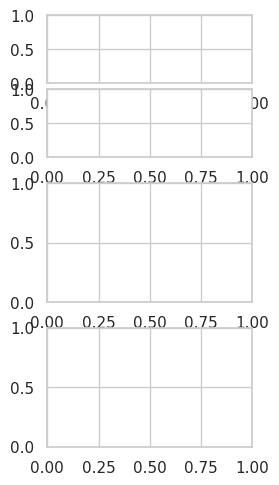

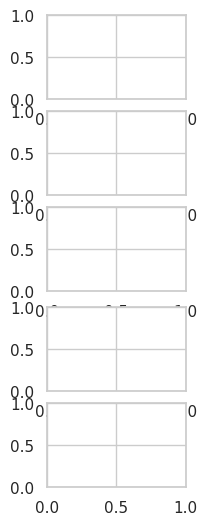

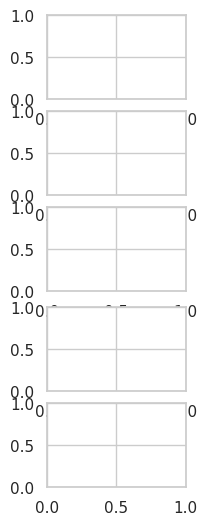

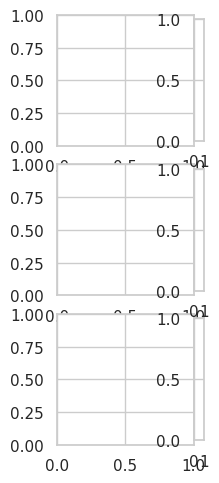

In [112]:
layout=load()

Fig4

In [113]:
ax=layout.axes[('fig2','ax3')]
ax.plot(df_test.time, df_test.odor, rasterized=True)
ax.set_rasterization_zorder(-20)

ax.set_ylabel('od, a.u.')
ax.yaxis.set_label_coords(-0.05, 0.5)
ax.set_xlim(560,565)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,10],
                           xticks=[560,565],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [114]:
ax=layout.axes[('fig2','ax3_1')]
ax.plot(df_test.time, df_test.predicted_odor, rasterized=True)
ax.set_rasterization_zorder(-20)

ax.set_xlabel('time, s')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_ylabel('od$_{pr}$, a.u.')
ax.yaxis.set_label_coords(-0.05, 0.5)
ax.set_xlim(560,565)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,10],
                           xticks=[560,565],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

Fig5

In [115]:
n_bins = 20
ylim = (0,12000)
# Actual Whiff Data
df_actual = new_test_df1.copy()
bins = np.linspace(0, df_actual['distance_from_source'].max(), n_bins + 1)
df_actual['distance_bin'] = pd.cut(df_actual['distance_from_source'], bins=bins)

whiff_counts_actual = df_actual.groupby('distance_bin').size()
mean_concentrations_actual = df_actual.groupby('distance_bin')['odor'].mean()
bin_centers_actual = (bins[:-1] + bins[1:]) / 2

# Predicted Whiff Data
df_predicted = new_test_df2.copy()
bins_predicted = np.linspace(0, df_predicted['distance_from_source'].max(), n_bins + 1)
df_predicted['distance_bin'] = pd.cut(df_predicted['distance_from_source'], bins=bins_predicted)

whiff_counts_predicted = df_predicted.groupby('distance_bin').size()
mean_concentrations_predicted = df_predicted.groupby('distance_bin')['predicted_odor'].mean()
bin_centers_predicted = (bins_predicted[:-1] + bins_predicted[1:]) / 2

In [118]:
ax=layout.axes[('fig2','ax4')]
norm_actual = plt.Normalize(4, 10)
colors_actual = plt.cm.viridis(norm_actual(mean_concentrations_actual))
ax.bar(bin_centers_actual, whiff_counts_actual, width=(bins[1] - bins[0]), edgecolor='black', color=colors_actual, rasterized= True)
ax.set_rasterization_zorder(-20)
ax.set_ylabel('Whiff Count')
ax.yaxis.set_label_coords(-0.05, 0.5)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,12000],
                           xticks=[0,50],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

In [119]:
ax=layout.axes[('fig2','ax5')]
norm_predicted = plt.Normalize(4, 10)
colors_predicted = plt.cm.viridis(norm_predicted(mean_concentrations_predicted))
ax.bar(bin_centers_predicted, whiff_counts_predicted, width=(bins_predicted[1] - bins_predicted[0]), edgecolor='black', color=colors_predicted, rasterized=True)
ax.set_rasterization_zorder(-20)

ax.set_xlabel('Distance from source, m')
ax.xaxis.set_label_coords(0.5, -0.1)

ax.set_ylabel('Whiff Count')
ax.yaxis.set_label_coords(-0.05, 0.5)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,12000],
                           xticks=[0,50],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')